# Trabajo Final
El objetivo de este trabajo es la realización de una serie de hitos, de acuerdo a lo descrito en el artículo "*A comparative study of machine learning classifiers for modeling travel mode choice*", que servirá de base para llevar a cabo lo requerido en cada uno de dichos hitos.

Para la tarea de predicción, puesto que es necesario decidir un método a utilizar de manera libre, se ha decidido usar el método de *Naive-Bayes* (NB).

## Lectura y Visualización de los Datos
Antes de comenzar a trabajar con los datos proporcionados, se debe comenzar viendo cómo se encuentran orgnizados dentro del archivo. Para ello, se cargará dicho archivo y se procederá a la obtención de algunos datos a partir de este, como la cantidad de elementos, características o los diferentes valores que toman.

In [1]:
# Importación del paquete Pandas para la lectura del archivo.
import pandas as pd

In [2]:
# Carga del archivo con los datos.
data = pd.read_csv("./nts_data.csv")

In [3]:
# Visualización de los primeros elementos.
data.head(5)

,mode_main,distance,density,age,male,ethnicity,education,income,cars,license,bicycles,weekend,diversity,green,temp,precip,wind
0,walk,1.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
1,walk,10.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
2,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
3,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
4,car,61.5,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8


In [4]:
print ("Características iniciales: " + str(len(data.columns)))
print ("Elementos totales: " + str(len(data.index)))

Características iniciales: 17
Elementos totales: 230608


In [5]:
# Visualización de los tipos de datos contenidos en el archivo.
data.dtypes

mode_main     object
distance     float64
density      float64
age            int64
male          object
ethnicity     object
education     object
income        object
cars           int64
license       object
bicycles       int64
weekend       object
diversity    float64
green        float64
temp         float64
precip       float64
wind         float64
dtype: object

Como se puede observar en el resultado de la ejecución de código anterior, existen diferentes tipos de valores en el archivo. No todos son de tipo cuantitativo, sino que también se encuentran datos de tipo cualitativo. Estos datos deberán transformarse para su posterior tratamiento a lo largo de este trabajo.

In [6]:
# Visualización de las variables cualitativas junto con el total de los diferentes valores que toma cada una.
catchar = list(data.select_dtypes(include=['object']))

for value in range(len(catchar)):
    print ("Valores diferentes para la característica '" + catchar[value] + "':")
    print data[catchar[value]].value_counts()
    
    if value != len(catchar) - 1:
        print ("\n")

Valores diferentes para la característica 'mode_main':
car     127439
bike     56298
walk     37571
pt        9300
Name: mode_main, dtype: int64


Valores diferentes para la característica 'male':
no     125676
yes    104932
Name: male, dtype: int64


Valores diferentes para la característica 'ethnicity':
native        201561
western        17772
nonwestern     11275
Name: ethnicity, dtype: int64


Valores diferentes para la característica 'education':
middle    88306
higher    79185
lower     63117
Name: education, dtype: int64


Valores diferentes para la característica 'income':
more40    106182
20to40     97140
less20     27286
Name: income, dtype: int64


Valores diferentes para la característica 'license':
yes    206986
no      23622
Name: license, dtype: int64


Valores diferentes para la característica 'weekend':
no     189250
yes     41358
Name: weekend, dtype: int64


Como resultado, se puede observar que no existen datos nulos, por lo que no es necesario el tratamiento de estos.

In [7]:
# Obtención de datos estadísticos de las variables cuantitativas iniciales.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance,230608.0,12.217913,23.545686,0.10000,1.50000,4.000000,12.000000,400.000000
density,230608.0,1.569055,1.593292,0.00184,0.59132,1.153210,1.952960,11.442960
age,230608.0,47.661356,15.934884,18.00000,36.00000,47.000000,60.000000,98.000000
cars,230608.0,1.382584,0.822056,0.00000,1.00000,1.000000,2.000000,10.000000
bicycles,230608.0,3.357134,1.936614,0.00000,2.00000,3.000000,4.000000,10.000000
diversity,230608.0,1.774927,0.493037,0.00000,1.38894,1.827390,2.172380,2.827560
green,230608.0,54.939470,22.172372,0.00000,37.11120,54.102123,74.381844,97.813002
temp,230608.0,13.316930,7.565732,-9.00000,8.00000,13.400000,19.000000,35.900000
precip,230608.0,2.184633,4.674801,0.00000,0.00000,0.100000,2.300000,142.300000
wind,230608.0,4.097702,1.914821,0.40000,2.70000,3.800000,5.100000,16.300000


## Tratamiento y Graficado de los Datos Iniciales
En primer lugar, se procederá a graficar los histogramas para las diferentes características, de manera que se pueda visualizar cómo se encuentran distribuidos sus valores. La realización de este prodecimiento se debe a que en la tabla estadística se han detectado que algunas características como la distancia o la densidad tienen valores máximos muy alejados de la media.

In [8]:
# Importación de paquetes necesarios para la representación gráfica de los datos.
import matplotlib.pyplot as plt
import seaborn as sb

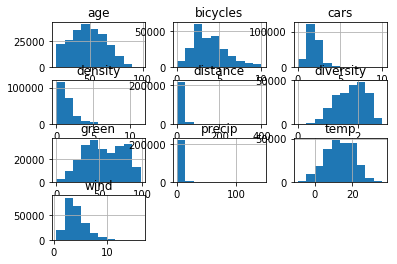

In [9]:
# Visualización de los valores del dataset
data.hist()
plt.show()

Como se puede observar, algunas de las variables poseen valores distribuidos de manera más homogénea que otras. Una vez que se dispone de una visualización rápida de los datos, se procede a realizar algunas transformaciones para la homogeneización de estos. Puesto que existen valores categóricos en alguna de las características, se realizará a su transformación numérica con respecto a unas reglas que se explican a continuación.

En el caso de que sean características cuyos valores tomen valores 'sí'/'no', se asignarán valores numéricos '1'/'0', respectivamente.

Por otra parte, en el caso de que las características tengan diferentes valores, se asignarán valores ascendentes (1, 2, 3, ...). De esta manera, aunque las características 'mode_main' o 'ethnicity' simplemente se clasificaran en la homogeneización, otras como 'education' e 'income' se verían mejor representadas, ya que conforme el nivel de educación o de ingresos sea mayor, el valor irá en aumento consecuentemente.

In [10]:
# Transformación de las características binarias (sí-no).
data['male'] = data['male'].map({'yes': 1, 'no': 0})
data['license'] = data['license'].map({'yes': 1, 'no': 0})
data['weekend'] = data['weekend'].map({'yes': 1, 'no': 0})

In [11]:
# Transformación del resto de características no numéricas.
data['mode_main'] = data['mode_main'].map({'bike': 1, 'car': 2, 'pt': 3, 'walk': 4})
data['ethnicity'] = data['ethnicity'].map({'native': 1, 'nonwestern': 2, 'western': 3})
data['education'] = data['education'].map({'lower': 1, 'middle': 2, 'higher': 3})
data['income'] = data['income'].map({'less20': 1, '20to40': 2, 'more40': 3})

# Hito 1
Usando la misma parametrización del clasificador que la descrita en el artículo estimar la precisión y sensibilidad del clasificador empleando *10-fold cross validation* y balanceamiento de datos. ¿Se reproducen los valores recogidos en el artículo?

El método de NB calcula probabilidades de clase utilizando el teroema de Bayes suponiendo que las características son independientes. No obstante, para calcular probabilidades a partir de características continuas, se deben establecer sus distribuciones de probabilidad. Normalmente, esto se lleva a cabo utilizando *kernel density estimation*. En el estudio, se usa un **factor de corrección de Laplace de 0.001** que, en el código, se ve traducido al parámetro *var_smoothing*.

Teniendo esta información extraída del artículo relacionado, se puede proceder a construir el modelo con el parámetro indicado.

In [12]:
# Selección de características a utilizar y 'target'
pred_caract = ['distance', 'density', 'age', 'male', 'ethnicity', 'education', 'income', 'cars', 'license',
               'bicycles', 'weekend', 'diversity', 'green', 'temp', 'precip', 'wind']
target = ['mode_main']

In [13]:
# Extracción de muestra aleatoria de 100.000 elementos
# data_sample = data.sample(n=100000, random_state=0)

In [14]:
# Extracción de las características que se utilizarán para la predicción.
# X = data_sample[pred_caract]

# Extracción de la característica a ser predicha (mode_main).
# y = data_sample[target]

In [15]:
# Importación del paquete necesario para dividir los datos en conjuntos de entrenamiento y test.
# from sklearn.model_selection import train_test_split

In [16]:
# Extracción de las muestras de entrenamiento (X_train, y_train) y de prueba (X_test, y_test).
# Se ha establecido un porcentaje del 70% para el entrenamiento y un 30% para evaluar el modelo.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# Importación del paquete que contiene el modelo a utilizar.
from sklearn.naive_bayes import GaussianNB

# Creación del modelo (se establece var_smoothing=0.001, de igual manera que se describe en el artículo)
model = GaussianNB(var_smoothing=0.001)

In [18]:
# Calcular n (número medio de observaciones por alternativa).
# Este valor se utilizará en el balanceo de las muestras.

k = 10

n_max = int(round((float(len(data.index))*(k-1)/k) / (data.mode_main.value_counts().size), 0))
print "El número medio de observaciones será de " + str(n_max) + "."

El número medio de observaciones será de 51887.


In [19]:
# Importación de los paquetes necesarios para la realización del k-fold y cálculo de la sensibilidad.
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
import numpy as np

In [20]:
kfold = KFold(n_splits=10, random_state=0)
iteracion = 1

data_bl_kfoldTrain = pd.DataFrame()
aux = pd.DataFrame()

scores = []
sensibilidades = []

for train_index, test_index in kfold.split(data):
    data_ub_kfoldTrain = data.iloc[train_index]
    data_kfoldTest = data.iloc[test_index]
    
    print "------Iteración " + str(iteracion) + "------"
    
    for mode_main in range(1, data_ub_kfoldTrain['mode_main'].nunique()+1):
        n_muestras = (data_ub_kfoldTrain['mode_main'] == mode_main).sum()
        
        if (n_muestras > n_max):
            n_rows_delete = n_muestras - n_max
            print "La alternativa " + str(mode_main) + " presenta " + str(n_muestras) + " muestras. " + \
            "Se procede a eliminar de manera aleatoria " + str(n_rows_delete) + " muestras."
            
            muestras_alternativa = data_ub_kfoldTrain.loc[data_ub_kfoldTrain['mode_main'] == mode_main]
            aux = muestras_alternativa.sample(n=n_max, replace=False, random_state=1)
            data_bl_kfoldTrain = data_bl_kfoldTrain.append(aux)
            
            print "Ahora la alternativa " + str(mode_main) + " se encuentra balanceada con " + str((data_bl_kfoldTrain['mode_main'] == mode_main).sum()) + " muestras.\n"
        elif (n_muestras < n_max):
            n_rows_add = n_max - n_muestras
            print "La alternativa " + str(mode_main) + " presenta " + str(n_muestras) + " muestras. " + \
            "Se procede a replicar de manera aleatoria " + str(n_rows_add) + " muestras."
            
            muestras_alternativa = data_ub_kfoldTrain.loc[data_ub_kfoldTrain['mode_main'] == mode_main]
            aux = muestras_alternativa.sample(n=n_max, replace=True, random_state=1)
            data_bl_kfoldTrain = data_bl_kfoldTrain.append(aux)
            
            print "Ahora la alternativa " + str(mode_main) + " se encuentra balanceada con " + str((data_bl_kfoldTrain['mode_main'] == mode_main).sum()) + " muestras.\n"
    
    X_train = data_bl_kfoldTrain[pred_caract]
    y_train = data_bl_kfoldTrain[target]
    X_test = data_kfoldTest[pred_caract]
    y_test = data_kfoldTest[target]
    
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicción
    y_pred = model.predict(X_test)
    
    scores.append(model.score(X_test, y_test))
    sensibilidades.append(recall_score(y_test, y_pred, average=None))
    
    data_bl_kfoldTrain.drop(data_bl_kfoldTrain.index, inplace=True)
    iteracion += 1
    

------Iteración 1------
La alternativa 1 presenta 51077 muestras. Se procede a replicar de manera aleatoria 810 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114724 muestras. Se procede a eliminar de manera aleatoria 62837 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8597 muestras. Se procede a replicar de manera aleatoria 43290 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 33149 muestras. Se procede a replicar de manera aleatoria 18738 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 2------
La alternativa 1 presenta 50451 muestras. Se procede a replicar de manera aleatoria 1436 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114855 muestras. Se procede a eliminar de manera aleatoria 62968 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8542 muestras. Se procede a replicar de manera aleatoria 43345 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 33699 muestras. Se procede a replicar de manera aleatoria 18188 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 3------
La alternativa 1 presenta 50712 muestras. Se procede a replicar de manera aleatoria 1175 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114449 muestras. Se procede a eliminar de manera aleatoria 62562 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8505 muestras. Se procede a replicar de manera aleatoria 43382 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 33881 muestras. Se procede a replicar de manera aleatoria 18006 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 4------
La alternativa 1 presenta 51434 muestras. Se procede a replicar de manera aleatoria 453 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114065 muestras. Se procede a eliminar de manera aleatoria 62178 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8695 muestras. Se procede a replicar de manera aleatoria 43192 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 33353 muestras. Se procede a replicar de manera aleatoria 18534 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 5------
La alternativa 1 presenta 50087 muestras. Se procede a replicar de manera aleatoria 1800 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 115207 muestras. Se procede a eliminar de manera aleatoria 63320 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8183 muestras. Se procede a replicar de manera aleatoria 43704 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 34070 muestras. Se procede a replicar de manera aleatoria 17817 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 6------
La alternativa 1 presenta 50521 muestras. Se procede a replicar de manera aleatoria 1366 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114749 muestras. Se procede a eliminar de manera aleatoria 62862 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8111 muestras. Se procede a replicar de manera aleatoria 43776 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 34166 muestras. Se procede a replicar de manera aleatoria 17721 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 7------
La alternativa 1 presenta 51249 muestras. Se procede a replicar de manera aleatoria 638 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114147 muestras. Se procede a eliminar de manera aleatoria 62260 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8539 muestras. Se procede a replicar de manera aleatoria 43348 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 33612 muestras. Se procede a replicar de manera aleatoria 18275 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 8------
La alternativa 1 presenta 49972 muestras. Se procede a replicar de manera aleatoria 1915 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 115455 muestras. Se procede a eliminar de manera aleatoria 63568 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8156 muestras. Se procede a replicar de manera aleatoria 43731 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 33964 muestras. Se procede a replicar de manera aleatoria 17923 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 9------
La alternativa 1 presenta 50257 muestras. Se procede a replicar de manera aleatoria 1630 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 115147 muestras. Se procede a eliminar de manera aleatoria 63260 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8024 muestras. Se procede a replicar de manera aleatoria 43863 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 34120 muestras. Se procede a replicar de manera aleatoria 17767 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------Iteración 10------
La alternativa 1 presenta 50922 muestras. Se procede a replicar de manera aleatoria 965 muestras.
Ahora la alternativa 1 se encuentra balanceada con 51887 muestras.

La alternativa 2 presenta 114153 muestras. Se procede a eliminar de manera aleatoria 62266 muestras.
Ahora la alternativa 2 se encuentra balanceada con 51887 muestras.

La alternativa 3 presenta 8348 muestras. Se procede a replicar de manera aleatoria 43539 muestras.
Ahora la alternativa 3 se encuentra balanceada con 51887 muestras.

La alternativa 4 presenta 34125 muestras. Se procede a replicar de manera aleatoria 17762 muestras.
Ahora la alternativa 4 se encuentra balanceada con 51887 muestras.



/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Cálculo de las sensibilidades medias de cada una de las alternativas teniendo en cuenta las 10 iteraciones
# realizadas anteriormente con k-fold.
sens_avg = []

for alternativa in range(0, data_ub_kfoldTrain['mode_main'].nunique()):
    aux = []
    
    for fold in range(len(sensibilidades)):
        aux.append(sensibilidades[fold][alternativa])
    
    sens_avg.append(np.mean(aux))

In [22]:
print "Precisión media tras 10 'folds': " + str(np.mean(scores))
print "Sensibilidad media por cada clase: " + str(sens_avg)

Precisión media tras 10 'folds': 0.38973921384188165
Sensibilidad media por cada clase: [0.254708371395498, 0.31660361548127564, 0.3963975566608947, 0.8386537699502818]


Atendiendo a los resultados de la precisión media y de la sensibilidad de cada una de las alternativas, se observa que la precisión se encuentra ligeramente por debajo en comparación con lo mostrado en el artículo, donde se sitúa en alrededor de un 60%.

En cuanto a la sensibilidad media de cada alternativa, se puede concluir que la que más acumula es la cuarta que, en este caso, corresponde con la alternativa "walk". El resto de alternativas presenta una sensibilidad menor a lo largo de las iteraciones.

# Cajón de sastre

In [ ]:
el_1 = data_sample.loc[data_sample['mode_main'] == 1]
el_2 = data_sample.loc[data_sample['mode_main'] == 2]
el_3 = data_sample.loc[data_sample['mode_main'] == 3]
el_4 = data_sample.loc[data_sample['mode_main'] == 4]

print (el_1.shape)
print (el_2.shape)
print (el_3.shape)
print (el_4.shape)